<a href="https://colab.research.google.com/github/Maucho6340/2145-data-science-probando-relaciones-con-regresion-lineal/blob/main/precios_de_inmuebles_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [61]:
#Leyendo los datos
import pandas as pd
datos = pd.read_csv('/content/precios_casas.csv')
datos.head(2)

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0


In [62]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


El dato Id no lo vamos a utilizar, por lo que lo eliminamos

In [63]:
print(datos.columns.tolist())


['Id', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso', 'cantidad_banos', 'capacidad_carros_garage', 'calidad_de_cocina_excelente', 'precio_de_venta']


In [64]:
datos = datos.drop(columns='Id')
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

Vamos a estimar el precio de la casa con respecto a los atributos que están incluido en el df.<br>
En tonces vamos a tener que entender que factores están relacionados con el precios de la casa y para ello utilizaremos el método de la correlación de Pearson.

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.(Inversamente proporcional)  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.(Directamente proporcional)<br>

La intensidad es lo que varía y que deterima la magnitud de esa correlación. Tendremos entonces correlaciones, muy leves, moderada, fuertes y muy fuertes.<br>
Cuando la correlación tiene a cero, quiere decir que no existe correlación.




In [65]:
# Correlación
corr=datos.corr()


In [66]:
corr['precio_de_venta']

,precio_de_venta
area_primer_piso,0.616557
tiene_segundo_piso,0.138541
area_segundo_piso,0.305311
cantidad_banos,0.563132
capacidad_carros_garage,0.640214
calidad_de_cocina_excelente,0.496223
precio_de_venta,1.000000


Aquí tenemos varias correlaciones, todas positivas y que influyen sobre el precio de venta.<br>
- Área del primer piso: Tiene una correlación positiva de 0.61.<br>
- Si tienen segundo piso: Tiene una correlación positiva leve.<br>
- Área del segundo piso: Tiene una correlación positiva moderada.<br>
- Cantidad de baños: Tiene correlación positivo y algo signifacnte.<br>
- capacidad del garage: Tiene correlación positiva y de consideración.<br>
- Calidad de la cocina: También tiene  correlación positiva e importante.<br>
Y el precio de venta tienen una correlación perfecta consigo mismo, pues ese es el valor de correlación.

####Actividad

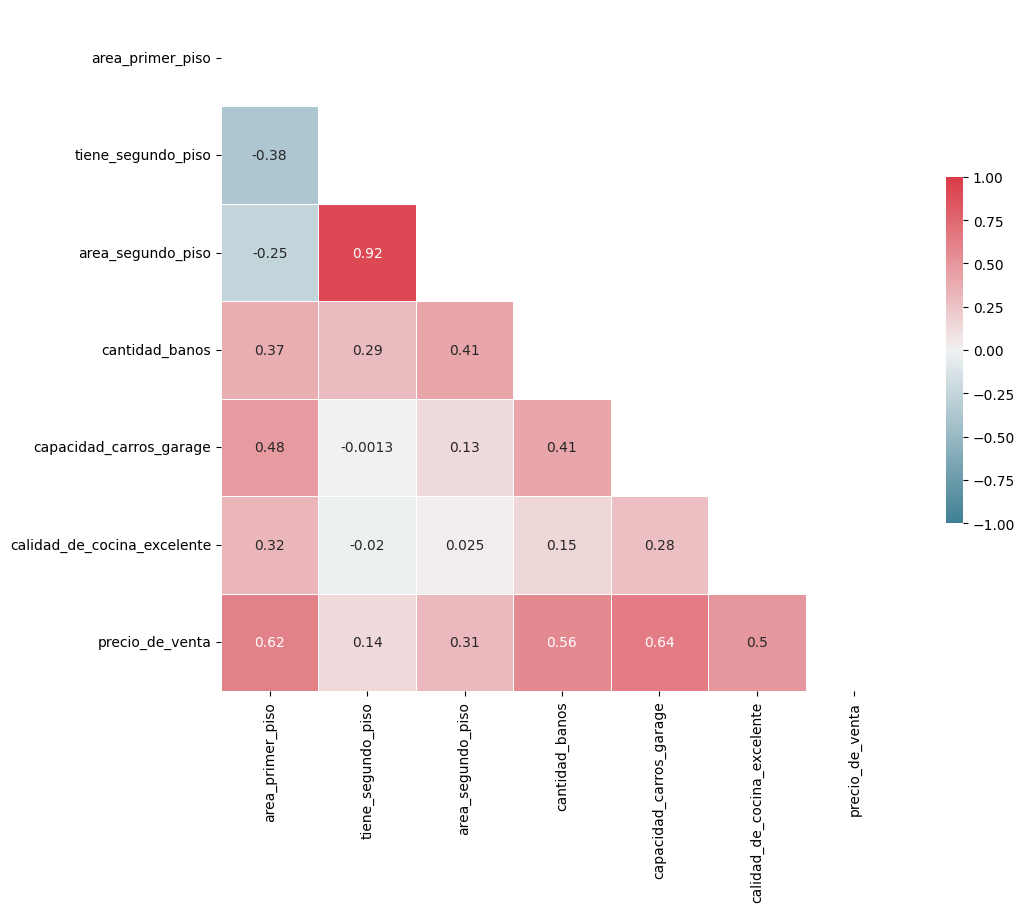

In [67]:
# Actividad
# Cuáles factores están más correlacionados?
# Actividad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leyendo datos
datos = pd.read_csv('/content/precios_casas.csv')
datos = datos.drop(columns = "Id")

# Correlación
corr = datos.corr()

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

Enumeramos algunos coeficientes para analizar:

- La correlación entre la capacidad de coches en la garaje y el área del primer piso es 0.48 moderadamente positiva, indicando que, en general, a medida que la capacidad de coches en la garaje aumenta, el área del primer piso de la casa tiende a aumentar también.
- Entre garaje para coches y cantidad de baños es moderadamente positiva (0.409281), indicando que, en general, a medida que la capacidad de la garaje aumenta, el número de baños también tiende a aumentar. Esto sugiere una posible asociación entre el espacio para estacionamiento de vehículos y el tamaño de la residencia.
- Cuando miramos la correlación entre el área del primer piso y el área del segundo piso, verificamos que es débil y negativa (-0.25). Esto sugiere que, en general, cuando el área del primer piso de una casa aumenta, el área del segundo piso tiende a disminuir un poco, y viceversa. Esta relación indica una posible compensación entre las áreas de los dos pisos, pero no es una relación muy fuerte y puede variar entre diferentes propiedades.<br>

<u>Observación</u>: Es importante notar que la correlación no implica causalidad; es decir, no podemos afirmar que el aumento en el precio de venta es causado específicamente por el aumento en el área del primer piso solo con el uso de la correlación, sino que estos factores están relacionados entre sí.

## Relacionando variables

In [68]:
# Importanmos la tres bibliotecas que vamos a estar utilizando para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

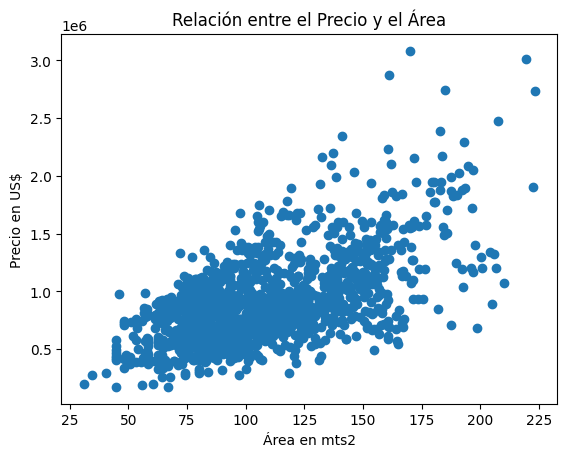

In [69]:
# Cómo se relacionan el área construída y el precio del inmueble?
# Vamos a usar un gráfico de dispersión
plt.scatter(x=datos['area_primer_piso'], y=datos['precio_de_venta'])
plt.title('Relación entre el Precio y el Área')
plt.xlabel('Área en mts2')
plt.ylabel('Precio en US$')
plt.show()


Nota que si tenemos una casa de 200 m2 el valor será de 2 millones y una casa de 125 m2 costará entre 1,5 millones y 500,000.00. Con este gráfico puedo tratar de trazar manualmente una recta que permita describir este comportamiento.


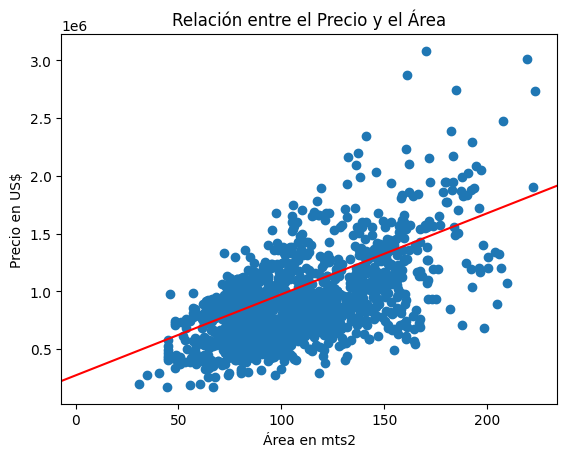

In [70]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?
plt.scatter(x=datos['area_primer_piso'], y=datos['precio_de_venta'])
plt.axline(xy1=(4,300000), xy2=(175,1500000), color='red')# Estos valores se obtuvieron a ojo en el gráfico
plt.title('Relación entre el Precio y el Área')
plt.xlabel('Área en mts2')
plt.ylabel('Precio en US$')
plt.show()

## Mejor recta

Utilizaremos el método de los mínimos cuadrados ordinarios (OLS:Ordinary List Squares)<br>
Hallar la distancia mínima con respecto a los residuos mínimos

In [71]:
# Cuál es la recta que mejor se ajusta a esta relación
px.scatter(datos,x='area_primer_piso', y='precio_de_venta', trendline_color_override='red', trendline='ols')



# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

NP: ¿Cómo el área de la casa, me ayuda a definir el precio de la casa?

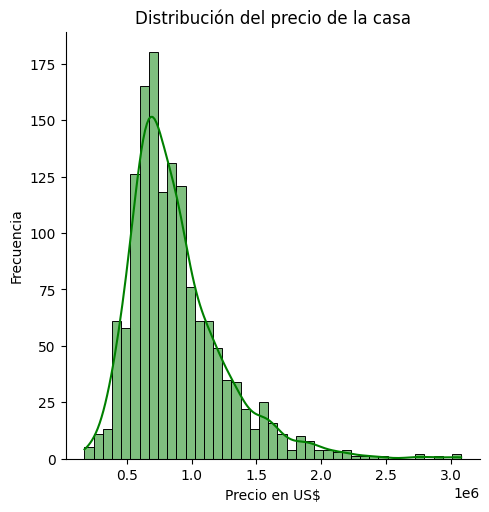

In [72]:
#Quién es nuestra variable de respuesta?
#Creamos un histograma para ver donde están los datos mas concentrados
sns.displot(datos['precio_de_venta'], kde=True, color='green')
plt.title('Distribución del precio de la casa')
plt.xlabel('Precio en US$')
plt.ylabel('Frecuencia')
plt.show()

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [73]:
# import train_test_split permite tomar la base y hacer una reparatición entre una base de entrenamiento y una base de prueba como tal.
from sklearn.model_selection import train_test_split

# Almacenamos en "y" el precio de venta
y=datos['precio_de_venta']
# Almacenamos en "X"", todo menos el precio de venta (drop). "X" mayúscula, por que son todos atributos de X
X=datos.drop(columns='precio_de_venta')

# Separamos grupos para entrenamiento y prueba. Con random_state garantizamos la reproductibilidad de la segregación de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)

In [74]:
#Datos de entrenamiento para usar la fórmula
# Creamos DF de prueba
df_train = pd.DataFrame(X_train)
df_train.head()
df_train['precio_de_venta'] = y_train
# Con esto creamos un DF de entrenamiento que tienen todas mis variables(X_train) y mi variable dependiente (y_train) en un solo DF

In [75]:
# import ols
from statsmodels.formula.api import ols

In [76]:
# ajustando el primer modelo a los datos de entrenamiento considerando el precio de venta y el área del 1er piso
modelo_0 = ols('precio_de_venta ~ area_primer_piso', data=df_train).fit()

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [77]:
# visualizando los parámetros
modelo_0.params

,0
Intercept,152909.288334
area_primer_piso,6793.641641


El resultado entrega el parámetro del área del 1er piso y el valor de interceptación, ambos en unidades dólares.

In [110]:
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Tue, 08 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        15:47:01   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

La técnica OLS me ayuda a deconsiderar los valores atípicos o outlayers

In [78]:
# El resumen del modelo


- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


##**Y = β₀ + β₁x + e**

Variable Respuesta (Y): También llamada variable dependiente, es aquella que estamos tratando de predecir.

Intercepto (β₀): El punto donde la línea de regresión intercepta el eje vertical (Y), es decir, el valor de Y cuando X es igual a 0.

Variable Explicativa (X): También llamada variable independiente, es el factor que usamos para predecir y explicar la variable respuesta.

Coeficientes de Regresión (β₁): Impacto de cada variable explicativa X en la variable respuesta, es el efecto de X en Y.

Error Residual (e): Diferencia entre los valores reales y previstos de la variable respuesta.


**Coeficientes**<br>

La relación lineal entre las variables X e Y se representa gráficamente por una línea. Este proceso de encontrar la línea ideal implica minimizar la distancia entre los puntos reales y la propia línea.

El ajuste de la línea de regresión lineal se simplifica mediante el método de los mínimos cuadrados. Este método tiene como objetivo encontrar la línea que mejor se ajusta a los datos observados, minimizando la suma de los cuadrados de las diferencias entre los valores reales y los valores previstos por la línea y calculando los coeficientes del modelo.

## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [79]:
# observando el R²


## Entendiendo el resíduo

In [80]:
# Quiénes son los residuos?


In [81]:
# Cómo están distribuidos


<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [82]:
# definiendo la 'Y' prevista


In [83]:
# importando el r2_score


In [84]:
# mostrando el resultado de r²


# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

In [85]:
# cuáles otras características podrían explicar el precio de los inmuebles?


In [86]:
#Vamos a analizar solamente y_vars='precio_de_venta'


## Añadiendo factores al modelo

In [87]:
# importando la api de statsmodels


In [88]:
# Añadiendo una constante


In [89]:
# Creando el modelo de regresión (con todas las variables): saturado


In [90]:
# Modelo sin el área del segundo piso


In [91]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso


In [92]:
# Resumen del modelos


## Comparando los modelos
Cuál es el modelo?


In [93]:
# Cuántos parámetros tiene el modelo?


# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [94]:
# Añadiendo una constante en X_test


In [95]:
# Previsión con el modelo 3


In [96]:
# Cuál es el r² de la previsión?


In [97]:
# Cuál es el R² del entrenamiento?


## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [98]:
#Nuevo inmueble


In [99]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?


In [100]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [101]:
# Leyendo varias casas?


In [102]:
# Añadiendo una constante


In [103]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()


# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [104]:
# importar el VIF de statsmodel


In [105]:
# VIF 1


In [106]:
# VIF 3


## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">